<h1>Making use of a template to estimate correlation</h1>

author: indranil

There are faster implementaions of the codes, use those if necessary. The notebook is an attempt to understand how the individual functions work. If you are benefitted by this notebook, make sure to pay the author for a cup of coffee.

In [54]:
import numpy as np

arr1 = np.array([3, 2, 4, 1, 3, 8, 4, 0, 3, 8, 0, 7, 7, 7, 1, 2])

template = np.array([3,7,5])

print(arr1)

len_padding = 1
padded_arr1 = np.zeros(len(arr1) + 2 * len_padding)

padded_arr1[len_padding : len(arr1) + len_padding] = arr1[:]

padded_arr1[0 : len_padding] = arr1[0]
padded_arr1[- len_padding : ] = arr1[len(arr1) - 1]

print(padded_arr1)

corr_arr = np.zeros(len(arr1))

for i in range(len(arr1)):

    sum_val = 0
    img_sq_val = 0
    template_sq_val = 0

    for j in range(len(template)):
    
        sum_val += (padded_arr1[i + j * len_padding] * template[j])
        img_sq_val += padded_arr1[i + j * len_padding] ** 2
        template_sq_val += template[j] ** 2

    corr_arr[i] += sum_val / (np.sqrt(img_sq_val) * np.sqrt(template_sq_val))

print(corr_arr)

print(np.argmax(corr_arr))

[3 2 4 1 3 8 4 0 3 8 0 7 7 7 1 2]
[3. 3. 2. 4. 1. 3. 8. 4. 0. 3. 8. 0. 7. 7. 7. 1. 2. 2.]
[0.93607275 0.87645659 0.93414848 0.73190244 0.81662951 0.988974
 0.6381449  0.592727   0.78366303 0.83505077 0.60921943 0.93138063
 0.95058638 0.82737924 0.56760691 0.98787834]
5


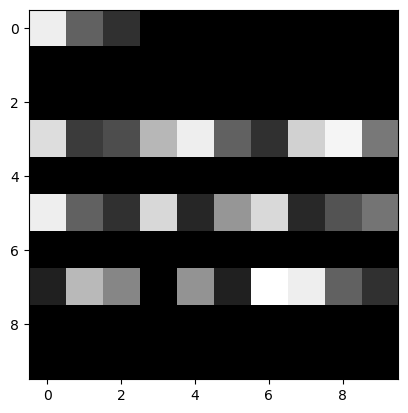

In [55]:
from matplotlib import pyplot as plt
from matplotlib import image as img

import random

image = np.zeros((10, 10), dtype = float)

template = np.array([random.randint(0,256) for i in range(3)])

# The header contains the template array
image[0][0:3] += template

image[3] += np.array([random.randint(0,256) for i in range(10)])
image[3][4:7] = template

image[5] += np.array([random.randint(0,256) for i in range(10)])
image[5][0:3] = template

image[7] += np.array([random.randint(0,256) for i in range(10)])
image[7][7:10] = template

plt.figure()
plt.imshow(image, cmap='grey')
plt.show()

In [56]:
len_padding = 1
padded_arr1 = np.zeros(len(arr1) + 2 * len_padding)

arr1 = image[3]

padded_arr1[len_padding : len(arr1) + len_padding] = arr1[:]

padded_arr1[0 : len_padding] = arr1[0]
padded_arr1[- len_padding : ] = arr1[len(arr1) - 1]

print(padded_arr1)

corr_arr = np.zeros(len(arr1))

for i in range(len(arr1)):

    sum_val = 0
    img_sq_val = 0
    template_sq_val = 0

    for j in range(len(template)):
    
        sum_val += (padded_arr1[i + j * len_padding] * template[j])
        img_sq_val += padded_arr1[i + j * len_padding] ** 2
        template_sq_val += template[j] ** 2

    corr_arr[i] += np.nan_to_num(sum_val / (np.sqrt(img_sq_val) * np.sqrt(template_sq_val)))

print(corr_arr)

print(np.argmax(corr_arr))

[197. 197.  53.  69. 163. 212.  88.  43. 187. 219. 107.   0.   0.   0.
   0.   0.   0. 107.]
[0.92677274 0.98214741 0.56355846 0.59054675 0.86692183 1.
 0.61830285 0.5145668  0.88533304 0.98107254]
5


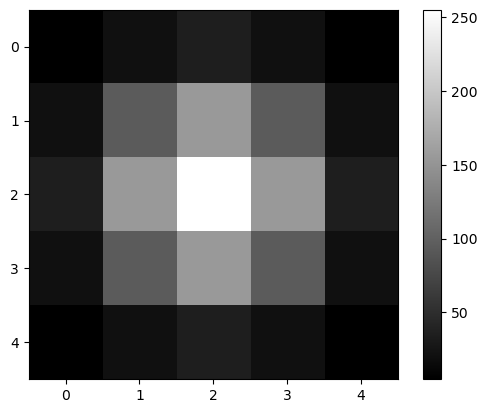

In [57]:
def gaussian_kernel(size: int, sigma: float) -> np.ndarray:
    
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * 
                    np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

size = 5
sigma = 1.0

gaussian_kernel_5x5 = gaussian_kernel(size, sigma)

gaussian_kernel_5x5 = (gaussian_kernel_5x5 / np.max(gaussian_kernel_5x5)) * 255

plt.figure()
plt.imshow(gaussian_kernel_5x5, cmap='grey')
plt.colorbar()
plt.show()

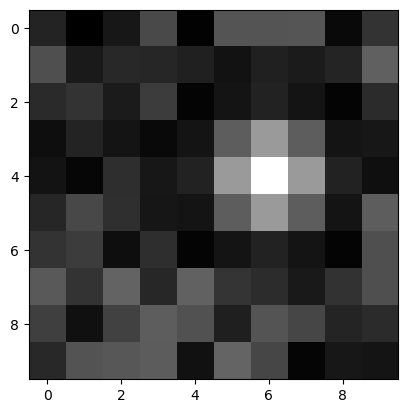

2


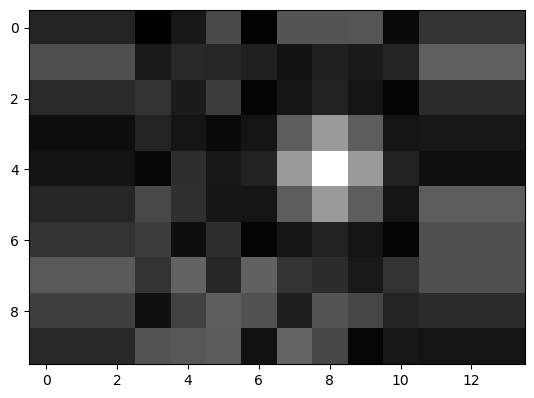

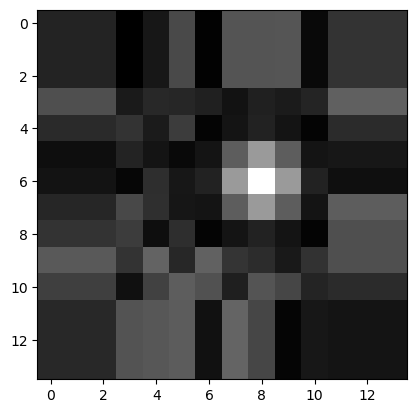

In [58]:
img_grey_10x10 = np.array([[random.randint(0,100) for j in range(10)] for i in range(10)])

img_grey_10x10[2:7, 4:9] = gaussian_kernel_5x5

plt.figure()
plt.imshow(img_grey_10x10, cmap='grey')
plt.show()

template = gaussian_kernel_5x5

# Creating padded image for processing

len_padding = len(template) // 2

print(len_padding)

img_grey_padded_1d = np.zeros((len(img_grey_10x10), len(img_grey_10x10[0]) + len_padding * 2), dtype=float)

for row_img_idx, row_img in enumerate(img_grey_10x10):
    padded_arr = np.zeros(len(row_img) + len_padding * 2, dtype=float)
    padded_arr[len_padding:len_padding + len(row_img)] = row_img

    padded_arr[0:len_padding] = row_img[0]
    padded_arr[-len_padding:] = row_img[-1]

    img_grey_padded_1d[row_img_idx] = padded_arr

plt.figure()
plt.imshow(img_grey_padded_1d, cmap='grey')
plt.show()

img_grey_padded_2d = np.zeros((len(img_grey_10x10) + len_padding * 2, len(img_grey_10x10[0]) + len_padding * 2), dtype=float)
img_grey_padded_2d[len_padding : len_padding + len(img_grey_10x10)] = img_grey_padded_1d

img_grey_padded_2d[0 : len_padding] = img_grey_padded_1d[0]
img_grey_padded_2d[-len_padding : ] = img_grey_padded_1d[-1]

plt.figure()
plt.imshow(img_grey_padded_2d, cmap='grey')
plt.show()

In [59]:
corr_arr = np.zeros((len(img_grey_10x10), len(img_grey_10x10)), dtype=float)

for row_idx in range(len(img_grey_10x10)):
    for col_idx in range(len(img_grey_10x10[0])):
        
        region = img_grey_padded_2d[row_idx:row_idx + len(template), col_idx:col_idx + len(template)]
        
        sum_val = np.sum(region * template)
        img_sq_val = np.sum(region ** 2)
        template_sq_val = np.sum(template ** 2)

        corr_arr[row_idx, col_idx] = np.nan_to_num(sum_val / (np.sqrt(img_sq_val) * np.sqrt(template_sq_val)))

max_corr_idx = np.unravel_index(np.argmax(corr_arr), corr_arr.shape)
print(f"Spot Index:{int(max_corr_idx[0]), int(max_corr_idx[1])}")

Spot Index:(4, 6)


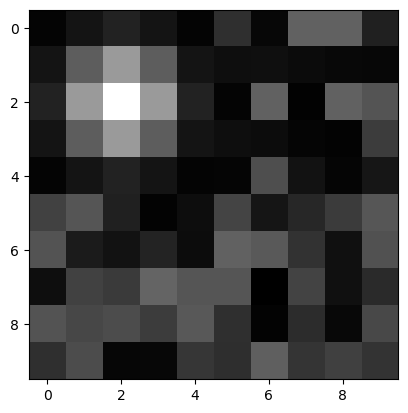

Spot Index:(2, 2)


In [60]:
img_grey_10x10 = np.array([[random.randint(0,100) for j in range(10)] for i in range(10)])

img_grey_10x10[0:5, 0:5] = gaussian_kernel_5x5

plt.figure()
plt.imshow(img_grey_10x10, cmap='grey')
plt.show()

template = gaussian_kernel_5x5

# Creating padded image for processing

len_padding = len(template) // 2

# print(len_padding)

img_grey_padded_1d = np.zeros((len(img_grey_10x10), len(img_grey_10x10[0]) + len_padding * 2), dtype=float)

for row_img_idx, row_img in enumerate(img_grey_10x10):
    padded_arr = np.zeros(len(row_img) + len_padding * 2, dtype=float)
    padded_arr[len_padding:len_padding + len(row_img)] = row_img

    padded_arr[0:len_padding] = row_img[0]
    padded_arr[-len_padding:] = row_img[-1]

    img_grey_padded_1d[row_img_idx] = padded_arr

# plt.figure()
# plt.imshow(img_grey_padded_1d, cmap='grey')
# plt.show()

img_grey_padded_2d = np.zeros((len(img_grey_10x10) + len_padding * 2, len(img_grey_10x10[0]) + len_padding * 2), dtype=float)
img_grey_padded_2d[len_padding : len_padding + len(img_grey_10x10)] = img_grey_padded_1d

img_grey_padded_2d[0 : len_padding] = img_grey_padded_1d[0]
img_grey_padded_2d[-len_padding : ] = img_grey_padded_1d[-1]

# plt.figure()
# plt.imshow(img_grey_padded_2d, cmap='grey')
# plt.show()

corr_arr = np.zeros((len(img_grey_10x10), len(img_grey_10x10)), dtype=float)

for row_idx in range(len(img_grey_10x10)):
    for col_idx in range(len(img_grey_10x10[0])):
        
        region = img_grey_padded_2d[row_idx:row_idx + len(template), col_idx:col_idx + len(template)]
        
        sum_val = np.sum(region * template)
        img_sq_val = np.sum(region ** 2)
        template_sq_val = np.sum(template ** 2)

        corr_arr[row_idx, col_idx] = np.nan_to_num(sum_val / (np.sqrt(img_sq_val) * np.sqrt(template_sq_val)))

max_corr_idx = np.unravel_index(np.argmax(corr_arr), corr_arr.shape)
print(f"Spot Index:{int(max_corr_idx[0]), int(max_corr_idx[1])}")